<a href="https://colab.research.google.com/github/Hrishikesh-ux/NLP_/blob/main/NLP_assignment4_2403A52274_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assignment 4

importing the required libraries

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import nltk
import spacy

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from nltk.corpus import stopwords


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

downloaded the libs

In [ ]:
!pip install nltk spacy scikit-learn matplotlib pandas
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 88.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

Loading the imdb dataset

In [ ]:
df = pd.read_csv('/content/IMDB Dataset.csv', engine='python', on_bad_lines='skip')

In [ ]:
# i am using df.head() to show first 5 entries
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
# i am using df.tail() to show last 5 entries
df.tail()

,review,sentiment
14204,Any Batman fan will know just how great the fi...,positive
14205,***SPOILERS*** ***SPOILERS*** It's easy to see...,positive
14206,Have you heard the theory of cloning redundanc...,negative
14207,There's not that much to say in the end. One w...,negative
14208,ELEPHANT WALK may not be the acme of literatur...,positive


Checking Sentiment Distribution

In [ ]:
print(df['sentiment'].value_counts())

sentiment
negative    7180
positive    7029
Name: count, dtype: int64


Separating Positive & Negative Reviews

In [ ]:
positive_reviews = positive_reviews[:1000]
negative_reviews = negative_reviews[:1000]

In [ ]:
stop_words = stopwords.words('english')

TF-IDF for Positive Reviews

In [ ]:
vectorizer_pos = TfidfVectorizer(
    stop_words=stop_words,
    lowercase = True,
    max_features=2000
    )

In [ ]:
tfidf_pos = vectorizer_pos.fit_transform(positive_reviews)
pos_scores = tfidf_pos.toarray()
pos_words = vectorizer_pos.get_feature_names_out()

pos_avg = pos_scores.mean(axis=0)

Top 15 Positive TF-IDF Words

In [ ]:
pos_dict = dict(zip(pos_words, pos_avg))

top_pos = sorted(pos_dict.items(), key=lambda x: x[1], reverse=True)[:15]

pos_terms, pos_values = zip(*top_pos)

print("Top 15 Positive TF-IDF Words:")
print(pos_terms)

Top 15 Positive TF-IDF Words:
('br', 'movie', 'film', 'one', 'like', 'good', 'great', 'story', 'see', 'well', 'would', 'really', 'time', 'love', 'much')


TF-IDF for Negative Reviews

In [ ]:
vectorizer_neg = TfidfVectorizer(
    stop_words=stop_words,
    lowercase=True,
    max_features=2000
)

tfidf_neg = vectorizer_neg.fit_transform(negative_reviews)

neg_scores = tfidf_neg.toarray()
neg_words = vectorizer_neg.get_feature_names_out()

neg_avg = neg_scores.mean(axis=0)


Top 15 Negative TF-IDF Words

In [ ]:
neg_dict = dict(zip(neg_words, neg_avg))

top_neg = sorted(neg_dict.items(), key=lambda x: x[1], reverse=True)[:15]

neg_terms, neg_values = zip(*top_neg)

print("Top 15 Negative TF-IDF Words:")
print(neg_terms)


Top 15 Negative TF-IDF Words:
('br', 'movie', 'film', 'one', 'like', 'bad', 'good', 'even', 'would', 'really', 'see', 'time', 'story', 'made', 'get')


Visualization (Side-by-Side Bar Charts) by using matplotlib

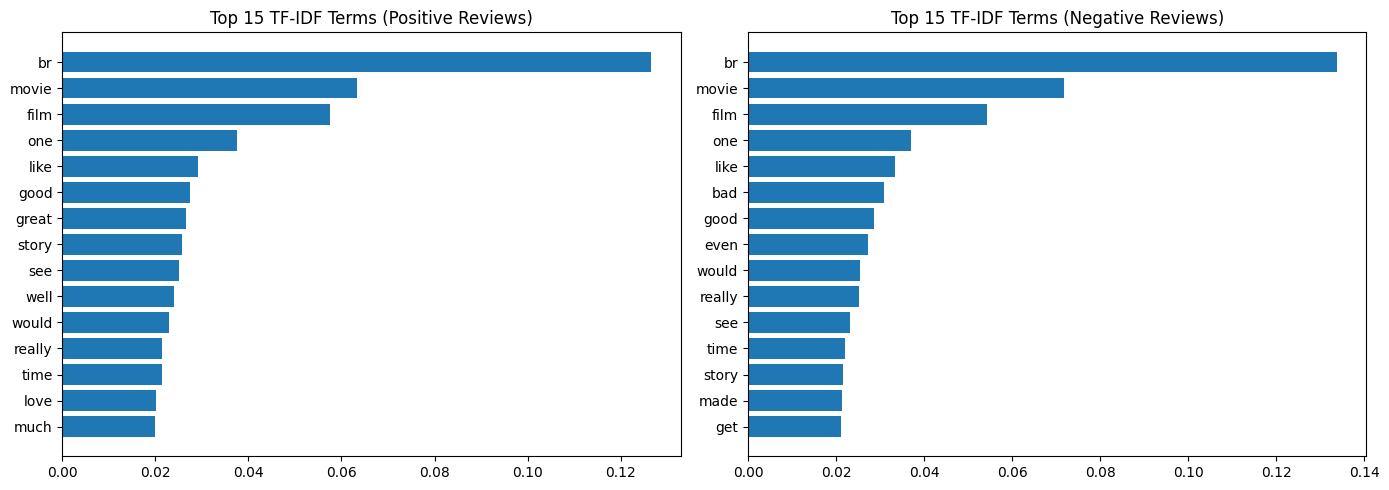

In [ ]:
plt.figure(figsize=(14,5))

# at this point i am showing Positive
plt.subplot(1,2,1)
plt.barh(pos_terms, pos_values)
plt.title("Top 15 TF-IDF Terms (Positive Reviews)")
plt.gca().invert_yaxis()

# at this point i am showing Negative
plt.subplot(1,2,2)
plt.barh(neg_terms, neg_values)
plt.title("Top 15 TF-IDF Terms (Negative Reviews)")
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()
